<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Derivatives Analytics with Python

**_Chapters 9-10_**

**Wiley Finance (2015)**

<img src="http://hilpisch.com/images/derivatives_analytics_front.jpg" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='mailto:dawp@tpq.io'>dawp@tpq.io</a> | <a href='http://tpq.io'>http://tpq.io</a>

Python online training | <a href='http://training.tpq.io'>http://training.tpq.io</a>

DX Analytics library | <a href='http://dx-analytics.com'>http://dx-analytics.com</a>

In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Chapter 9: General Market Model

### Zero-Coupon Bond Valuation

In [2]:
%run 09_gmm/CIR_zcb_valuation.py

ZCB Value       0.9608


### European Option Valuation

In [3]:
%run 09_gmm/BCC_option_valuation.py

M76 Value       7.7611
H93 Value       6.8672
BCC97 Value     8.2942


## Monte Carlo Simulation

### CIR Model

In [4]:
%run 10_mcs/CIR_zcb_valuation_gen.py

ZCB Value       0.8373


In [5]:
%run 10_mcs/CIR_zcb_simulation.py

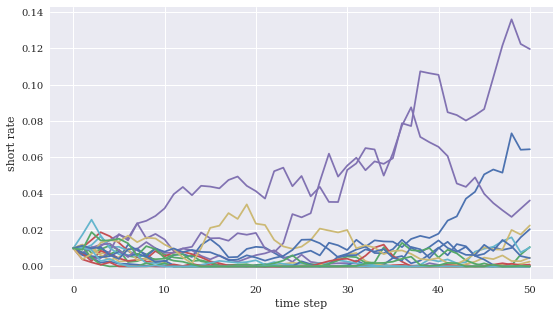

In [6]:
%matplotlib inline
plot_paths()
plt.savefig('../images/10_mcs/CIR_paths.pdf')

In [7]:
zcb_estimator(50).round(4)

array([ 0.9771,  0.9775,  0.9779,  0.9783,  0.9787,  0.9791,  0.9795,
        0.9799,  0.9803,  0.9807,  0.9811,  0.9815,  0.9819,  0.9823,
        0.9827,  0.9832,  0.9836,  0.984 ,  0.9845,  0.9849,  0.9853,
        0.9858,  0.9862,  0.9867,  0.9871,  0.9876,  0.988 ,  0.9885,
        0.9889,  0.9894,  0.9899,  0.9904,  0.9908,  0.9913,  0.9918,
        0.9923,  0.9928,  0.9933,  0.9938,  0.9943,  0.9948,  0.9953,
        0.9958,  0.9963,  0.9968,  0.9973,  0.9979,  0.9984,  0.9989,
        0.9995,  1.    ])

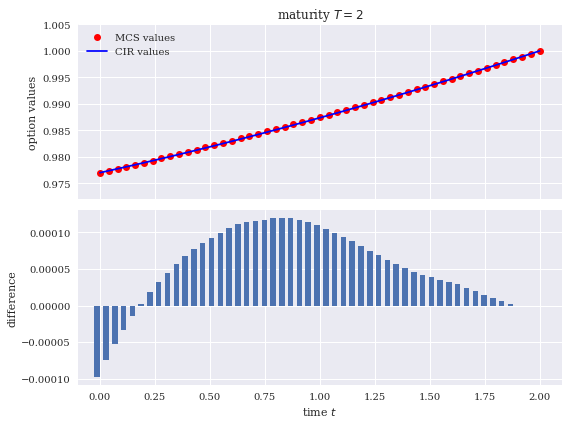

In [8]:
graphical_comparison(50, 'exact')
plt.savefig('../images/10_mcs/CIR_zcb_mcs_exact.pdf')

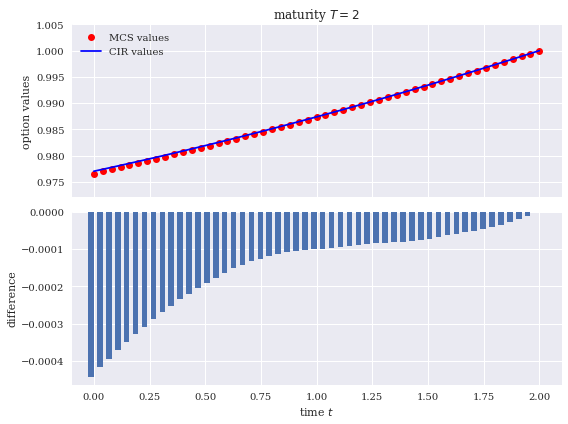

In [9]:
graphical_comparison(50, 'Euler')
plt.savefig('../images/10_mcs/CIR_zcb_mcs_euler.pdf')

In [10]:
zcb_estimator(200, 'Euler')[0]

0.97705077215883396

In [11]:
B([0.01, 0.1, 0.03, 0.2, 0., T])

0.97701414271761378

In [12]:
%timeit r = CIR_generate_paths(r0, kappa_r, theta_r, sigma_r, T, M, I, 'exact')

490 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit r = CIR_generate_paths(r0, kappa_r, theta_r, sigma_r, T, M, I, 'Euler')

143 ms ± 3.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
M = 4 * M
%timeit r = CIR_generate_paths(r0, kappa_r, theta_r, sigma_r, T, M, I, 'Euler')

531 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Chapter 10: Monte Carlo Simulation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### European Options

In [16]:
# %run 10_mcs/H93_european_mcs.py

In [17]:
import pandas as pd

In [18]:
h5 = pd.HDFStore('10_mcs/mcs_european.h5', 'r')
results = h5['results']
h5.close()

In [19]:
results['index_disc'] = results['index_disc'].apply(lambda x: x[0]) 
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [20]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161280 entries, 0 to 161279
Data columns (total 22 columns):
MCS_est            161280 non-null float64
PY1_acc            161280 non-null bool
PY2_acc            161280 non-null bool
PY_acc             161280 non-null bool
SE                 161280 non-null float64
anti_paths         161280 non-null bool
error              161280 non-null float64
index_disc         161280 non-null object
maturity           161280 non-null float64
moment_matching    161280 non-null bool
otype              161280 non-null object
panel              161280 non-null int64
paths              161280 non-null int64
rel_error          161280 non-null float64
runs               161280 non-null int64
steps              161280 non-null int64
strike             161280 non-null int64
timestamp          161280 non-null int64
value              161280 non-null float64
var_disc           161280 non-null object
PY1                161280 non-null float64
PY2             

In [21]:
cols = ['otype', 'runs', 'paths', 'index_disc', 'var_disc', 
        'moment_matching', 'anti_paths']

In [22]:
var_disc_select = ['F', 'P', 'T', 'A']
grouped = results[(results.steps == 50)
                & (results.paths == 100000)
                & (results.index_disc == 'L')
                & (results.var_disc.isin(var_disc_select))].groupby(cols)

In [23]:
mse = lambda x: np.sum(x ** 2) / len(x)
err = lambda x: sum(-x)

In [24]:
tab = grouped.agg({'value': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [25]:
tmpl = r'%4s & %3d & %6d &  %s  &  %s  & %5s & %5s & %3d & %3d & %7.5f & %7.5f \tn' 

In [26]:
table = ''
f = open('10_mcs/table_10_1.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'value', 'error']].iloc[i].values)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [27]:
print(table) # table 10.1

CALL &   5 & 100000 &  L  &  A  & False & False & 146 & 180 & 0.07670 & 3.74152 \tn
CALL &   5 & 100000 &  L  &  A  & False &  True & 146 & 180 & 0.07288 & 3.75574 \tn
CALL &   5 & 100000 &  L  &  A  &  True & False &   3 & 180 & 0.00633 & 0.00136 \tn
CALL &   5 & 100000 &  L  &  A  &  True &  True &   3 & 180 & 0.00468 & 0.00149 \tn
CALL &   5 & 100000 &  L  &  F  & False & False & 146 & 180 & 0.03556 & 3.63164 \tn
CALL &   5 & 100000 &  L  &  F  & False &  True & 148 & 180 & 0.03462 & 3.62426 \tn
CALL &   5 & 100000 &  L  &  F  &  True & False &   1 & 180 & -0.01659 & 0.00113 \tn
CALL &   5 & 100000 &  L  &  F  &  True &  True &   1 & 180 & -0.01299 & 0.00090 \tn
CALL &   5 & 100000 &  L  &  P  & False & False & 144 & 180 & 0.03942 & 3.68678 \tn
CALL &   5 & 100000 &  L  &  P  & False &  True & 145 & 180 & 0.04079 & 3.64441 \tn
CALL &   5 & 100000 &  L  &  P  &  True & False &   1 & 180 & -0.01474 & 0.00108 \tn
CALL &   5 & 100000 &  L  &  P  &  True &  True &   1 & 180 & -0.01128 & 

In [28]:
grouped = results[(results.steps == 50)
                & (results.paths == 100000)
                & (results.moment_matching == True)
                & (results.anti_paths == True)].groupby(cols)

In [29]:
tab = grouped.agg({'value': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [30]:
table = ''
f = open('10_mcs/table_10_2.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'value', 'error']].iloc[i].values)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [31]:
print(table)  # table 10.2

CALL &   5 & 100000 &  L  &  A  &  True &  True &   3 & 180 & 0.00468 & 0.00149 \tn
CALL &   5 & 100000 &  L  &  F  &  True &  True &   1 & 180 & -0.01299 & 0.00090 \tn
CALL &   5 & 100000 &  L  &  H  &  True &  True &   4 & 180 & 0.01169 & 0.00175 \tn
CALL &   5 & 100000 &  L  &  P  &  True &  True &   1 & 180 & -0.01128 & 0.00111 \tn
CALL &   5 & 100000 &  L  &  R  &  True &  True &   5 & 180 & 0.01208 & 0.00253 \tn
CALL &   5 & 100000 &  L  &  S  &  True &  True &  13 & 180 & 0.02979 & 0.00659 \tn
CALL &   5 & 100000 &  L  &  T  &  True &  True &   3 & 180 & 0.01147 & 0.00162 \tn
CALL &   5 & 100000 &  N  &  A  &  True &  True &   1 & 180 & 0.00805 & 0.00101 \tn
CALL &   5 & 100000 &  N  &  F  &  True &  True &   2 & 180 & -0.01566 & 0.00104 \tn
CALL &   5 & 100000 &  N  &  H  &  True &  True &   4 & 180 & 0.00545 & 0.00226 \tn
CALL &   5 & 100000 &  N  &  P  &  True &  True &   4 & 180 & -0.01526 & 0.00120 \tn
CALL &   5 & 100000 &  N  &  R  &  True &  True &   6 & 180 & 0.01221 & 

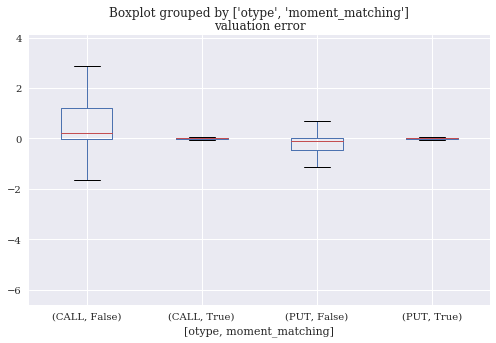

In [32]:
results[results.paths == 100000].boxplot('error',
            by=['otype', 'moment_matching'], figsize=(8, 5))
plt.title('valuation error')
plt.savefig('../images/10_mcs/box_mm.pdf')

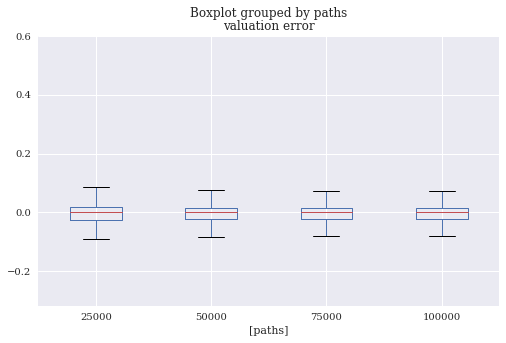

In [33]:
results[results.moment_matching == True].boxplot(
            'error', by=['paths'], figsize=(8, 5))
plt.title('valuation error')
plt.savefig('../images/10_mcs/box_paths.pdf')

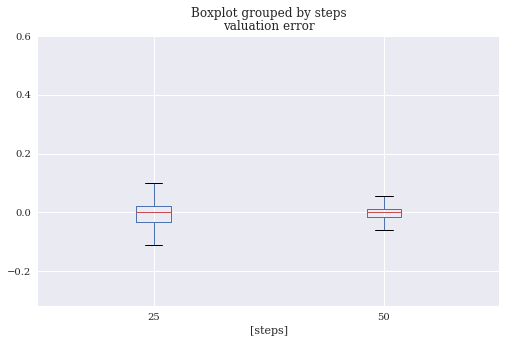

In [34]:
results[results.moment_matching == True].boxplot(
        'error', by=['steps'], figsize=(8, 5))
plt.title('valuation error')
plt.savefig('../images/10_mcs/box_steps.pdf')

### American Options

In [35]:
# %run 10_mcs/SVSI_american_speed.py
# just to measure the valuation time per single valuation

In [36]:
# sum(results['PY_acc'])

In [37]:
# np.mean(results['error'])

In [38]:
# np.mean(results['rel_error'])

In [39]:
# %run 10_mcs/SVSI_american_mcs_10_3.py
# takes about 15 mins

In [40]:
h5 = pd.HDFStore('10_mcs/mcs_american_10_3_lam_1.h5', 'r')
results = h5['results']
h5.close()

In [41]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5039
Data columns (total 24 columns):
LSM_convar         5040 non-null float64
LSM_pure           5040 non-null float64
MCS_euro           5040 non-null float64
PY1                5040 non-null float64
PY1_acc            5040 non-null bool
PY2                5040 non-null float64
PY2_acc            5040 non-null bool
PY_acc             5040 non-null bool
SE                 5040 non-null float64
V0_euro            5040 non-null float64
anti_paths         5040 non-null bool
benchmark          5040 non-null float64
control_variate    5040 non-null bool
error              5040 non-null float64
maturity           5040 non-null float64
moment_matching    5040 non-null bool
panel              5040 non-null int64
paths              5040 non-null int64
rel_error          5040 non-null float64
runs               5040 non-null int64
steps              5040 non-null int64
strike             5040 non-null float64
timestamp        

In [42]:
results.iloc[0]

LSM_convar                 0.000219883
LSM_pure                   0.000306779
MCS_euro                   0.000235761
PY1                              0.025
PY1_acc                           True
PY2                              0.015
PY2_acc                          False
PY_acc                            True
SE                         4.21629e-05
V0_euro                    0.000148865
anti_paths                        True
benchmark                       0.0001
control_variate                   True
error                      0.000119883
maturity                     0.0833333
moment_matching                   True
panel                                0
paths                            25000
rel_error                      1.19883
runs                                 5
steps                               20
strike                              90
timestamp          1418551858903142000
var_disc               Full Truncation
Name: 0, dtype: object

In [43]:
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [44]:
cols = ['steps', 'paths', 'var_disc', 'control_variate', 
        'moment_matching', 'anti_paths']

In [45]:
grouped = results[(results.control_variate == True)
                  & (results.moment_matching == True)
                  & (results.anti_paths == True)].groupby(cols)

In [46]:
tab = grouped.agg({'benchmark': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [47]:
tmpl = r'%d & %3d & %6d &  %s  & %5s & %5s & %5s & %3d & %3d & %7.5f & %7.5f \tn' 

In [48]:
table = ''
f = open('10_mcs/table_10_3.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'benchmark', 'error']].iloc[i].values)
    dats.insert(0, 5)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [49]:
print(table)  # table 10.3

5 &  20 &  25000 &  A  &  True &  True &  True &   1 & 180 & -0.00117 & 0.00064 \tn
5 &  20 &  25000 &  F  &  True &  True &  True &   1 & 180 & -0.00105 & 0.00042 \tn
5 &  20 &  25000 &  H  &  True &  True &  True &   5 & 180 & 0.00043 & 0.00046 \tn
5 &  20 &  25000 &  P  &  True &  True &  True &   4 & 180 & -0.00379 & 0.00047 \tn
5 &  20 &  25000 &  R  &  True &  True &  True &   5 & 180 & -0.00187 & 0.00058 \tn
5 &  20 &  25000 &  S  &  True &  True &  True &   3 & 180 & -0.00290 & 0.00044 \tn
5 &  20 &  25000 &  T  &  True &  True &  True &   2 & 180 & 0.00072 & 0.00062 \tn
5 &  20 &  35000 &  A  &  True &  True &  True &   1 & 180 & -0.00836 & 0.00050 \tn
5 &  20 &  35000 &  F  &  True &  True &  True &   1 & 180 & -0.00289 & 0.00043 \tn
5 &  20 &  35000 &  H  &  True &  True &  True &   5 & 180 & -0.00205 & 0.00057 \tn
5 &  20 &  35000 &  P  &  True &  True &  True &   4 & 180 & -0.00328 & 0.00039 \tn
5 &  20 &  35000 &  R  &  True &  True &  True &   4 & 180 & -0.00543 & 0.0005

In [50]:
# %run 10_mcs/SVSI_american_mcs_10_4.py
# takes about 20 mins

In [51]:
h5 = pd.HDFStore('10_mcs/mcs_american_10_4_lam_1.h5', 'r')
results = h5['results']
h5.close()

In [52]:
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [53]:
results.iloc[0]

LSM_convar                 0.000356255
LSM_pure                   0.000356255
MCS_euro                   0.000282973
PY1                              0.025
PY1_acc                           True
PY2                              0.015
PY2_acc                          False
PY_acc                            True
SE                         0.000160474
V0_euro                    0.000148865
anti_paths                       False
benchmark                       0.0001
control_variate                  False
error                      0.000256255
maturity                     0.0833333
moment_matching                  False
panel                                0
paths                            35000
rel_error                      2.56255
runs                                 5
steps                               20
strike                              90
timestamp          1418553430517517000
var_disc                             F
Name: 0, dtype: object

In [54]:
var_disc_select = ['F', 'P', 'T', 'A']
grouped = results[(results.paths == 35000)
                  & (results.var_disc.isin(var_disc_select))].groupby(cols)

In [55]:
tab = grouped.agg({'benchmark': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [56]:
table = ''
f = open('10_mcs/table_10_4.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'benchmark', 'error']].iloc[i].values)
    dats.insert(0, 5)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [57]:
print(table) # table 10.4

5 &  20 &  35000 &  A  & False & False & False &  54 & 180 & -0.01504 & 0.00412 \tn
5 &  20 &  35000 &  A  & False & False &  True &  42 & 180 & -0.01279 & 0.00365 \tn
5 &  20 &  35000 &  A  & False &  True & False &  43 & 180 & -0.01126 & 0.00368 \tn
5 &  20 &  35000 &  A  & False &  True &  True &  42 & 180 & -0.01366 & 0.00351 \tn
5 &  20 &  35000 &  A  &  True & False & False &   0 & 180 & -0.00319 & 0.00041 \tn
5 &  20 &  35000 &  A  &  True & False &  True &   2 & 180 & -0.00594 & 0.00046 \tn
5 &  20 &  35000 &  A  &  True &  True & False &   1 & 180 & -0.00364 & 0.00037 \tn
5 &  20 &  35000 &  A  &  True &  True &  True &   0 & 180 & -0.00499 & 0.00045 \tn
5 &  20 &  35000 &  F  & False & False & False &  44 & 180 & -0.00894 & 0.00394 \tn
5 &  20 &  35000 &  F  & False & False &  True &  43 & 180 & -0.01226 & 0.00379 \tn
5 &  20 &  35000 &  F  & False &  True & False &  42 & 180 & -0.01283 & 0.00374 \tn
5 &  20 &  35000 &  F  & False &  True &  True &  46 & 180 & -0.01179 & 0.00

In [58]:
# %run 10_mcs/SVSI_american_mcs_10_5.py
# takes about 60 mins

In [59]:
h5 = pd.HDFStore('10_mcs/mcs_american_10_5_lam_1.h5', 'r')
results = h5['results']
h5.close()

In [60]:
results['var_disc'] = results['var_disc'].apply(lambda x: x[0]) 

In [61]:
results.iloc[0]

LSM_convar                 0.000245117
LSM_pure                    0.00021918
MCS_euro                   0.000122928
PY1                               0.01
PY1_acc                           True
PY2                               0.01
PY2_acc                          False
PY_acc                            True
SE                         3.94284e-05
V0_euro                    0.000148865
anti_paths                        True
benchmark                       0.0001
control_variate                   True
error                      0.000145117
maturity                     0.0833333
moment_matching                   True
panel                                0
paths                            35000
rel_error                      1.45117
runs                                 5
steps                               20
strike                              90
timestamp          1418555706404688000
var_disc                             F
Name: 0, dtype: object

In [62]:
var_disc_select = ['F', 'P', 'T', 'A']
grouped = results[(results.var_disc.isin(var_disc_select))].groupby(cols)

In [63]:
tab = grouped.agg({'benchmark': len, 'PY_acc': err, 'error': (np.mean, mse)})

In [64]:
table = ''
f = open('10_mcs/table_10_5.tex', 'w')
for i in range(len(tab)):
    dats = list(tab.iloc[i].name)
    dats.extend(tab[['PY_acc', 'benchmark', 'error']].iloc[i].values)
    dats.insert(0, 5)
    row = tmpl % tuple(dats) + '\n'
    table += row
    f.write(row)
f.close()

In [65]:
print(table) # table 10.5

5 &  20 &  35000 &  A  &  True &  True &  True &  10 & 180 & -0.00417 & 0.00038 \tn
5 &  20 &  35000 &  F  &  True &  True &  True &  11 & 180 & -0.00241 & 0.00043 \tn
5 &  20 &  35000 &  P  &  True &  True &  True &  10 & 180 & -0.00323 & 0.00051 \tn
5 &  20 &  35000 &  T  &  True &  True &  True &  15 & 180 & -0.00318 & 0.00051 \tn
5 &  20 & 100000 &  A  &  True &  True &  True &  14 & 180 & -0.00928 & 0.00048 \tn
5 &  20 & 100000 &  F  &  True &  True &  True &  15 & 180 & -0.00857 & 0.00033 \tn
5 &  20 & 100000 &  P  &  True &  True &  True &  20 & 180 & -0.00855 & 0.00047 \tn
5 &  20 & 100000 &  T  &  True &  True &  True &  15 & 180 & -0.00981 & 0.00047 \tn
5 &  20 & 200000 &  A  &  True &  True &  True &  17 & 180 & -0.00966 & 0.00040 \tn
5 &  20 & 200000 &  F  &  True &  True &  True &  19 & 180 & -0.01116 & 0.00044 \tn
5 &  20 & 200000 &  P  &  True &  True &  True &  15 & 180 & -0.01055 & 0.00043 \tn
5 &  20 & 200000 &  T  &  True &  True &  True &  16 & 180 & -0.01032 & 0.00

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Online Training** |
<a href="http://certificate.tpq.io" target="_blank">Python for Algorithmic Trading University Certificate</a>